# File I/O

In the setup of ultrasound tomography workflows, there are usually a number of intermediate files that are generated describing aspects such as medium properties, transducer impulse responses or data recorded during laboratory experiments. 

In Stride, we propose the use of the Hierarchical Data Format (HDF5) for saving and loading these datasets and provide a series of tools to conveniently interact with them.

Here, we show the basics about how to interact with HDF5 files in Stride. The easiest way to manage files in Stride is through the methods provided by most relevant classes.

Any Stride class that inherits from `stride.Saved`, that is all classes that define the problem, can be written to disk. The generated files will have all the information that is necessary to load them afterwards.

In particular, any Stride class that inherits from `stride.GriddedSaved`, such as scalar and vector fields, and time traces, will also be saved with information about the grid on which they were generated. The grid information will also be re-generated when loading these from disk.


## Writing to disk

Let's start by creating a scalar field object containing some speed-of-sound distribution:

In [1]:
from stride import Space, Time, Grid, ScalarField

space = Space(shape=(100, 100), spacing=0.5e-3)
time = Time(0.0e-6, 0.1e-6, 1000)
grid = Grid(space, time)

vp = ScalarField(name="vp", grid=grid)
vp.fill(1500.)

We can then write the scalar field to disk by calling the `dump()` method and providing some filename.

In [2]:
vp.dump(filename="test_vp.h5")

The `dump()` method can be called with multiple different parameters. If the `filename` parameter is given, that will be used as the full path to the file.

Otherwise, the file name will be automatically generated and will be of the form `<project_name>-<name>.h5`, with `project_name` being another keyword argument for `dump()` and `name` being the name given to the scalar field in camel case.

An optional `version` keyword argument can also be provided, in which case the generated file name will be of the form `<project_name>-<name>-<version>.h5`, and a `path` for the file can also be given through another argument.

For more information on how these parameters are handled, you can check the documentation for the HDF5 object in Mosaic:

In [3]:
from mosaic import h5

print(h5.HDF5.__doc__)


    This class provides an interface to read and write HDF5 files. It can be used by instantiating the
    class on its own,

    >>> file = HDF5(...)
    >>> file.write(...)
    >>> file.close()

    or as a context manager,

    >>> with HDF5(...) as file:
    >>>     file.write(...)

    If a particular version is given, the filename will be generated without checks. If no version is given,
    the ``path`` will be checked for the latest available version of the file.

    The file will have the form ``<project_name>-<parameter in camelcase><extension>`` for version 0 and
    ``<project_name>-<parameter in camelcase>-<version with width of 5><extension>`` for higher versions.

    Parameters
    ----------
    filename : str
        Full path to a file, instead of a file being formed with version.
    path : str
        Location of the file in the filesystem, defaults to the current working directory.
    project_name : str
        Name of the project, the prefix that all files of 

## Reading from disk

To read from disk, we can use the corresponding `load()` method of the scalar field, which takes identical parameters to `dump()`.

In [4]:
vp_loaded = ScalarField(name="vp_loaded", grid=grid)
vp_loaded.load(filename="test_vp.h5")

Let's check that the loaded Vp is correct:

<IPython.core.display.Javascript object>


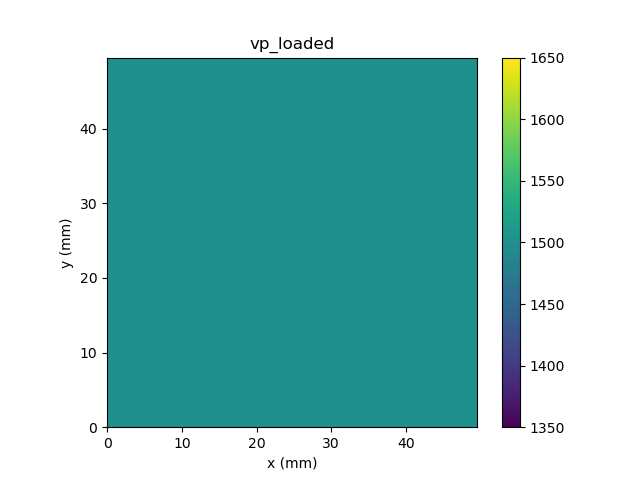

<AxesSubplot:title={'center':'vp_loaded'}, xlabel='x (mm)', ylabel='y (mm)'>

In [5]:
%matplotlib notebook
vp_loaded.plot()